# High-dimensional Outlier Detection - Introduction

This notebook is all about the paper by Beyer et al. [1] and, i.e. their Theorem 1 that
formalized the problem of nearest neighbor based outlier detection in high-dimensional 
outlier detection settings.

[1] K. Beyer, J. Goldstein, R. Ramakrishnan, and U. Shaft, “When Is ‘Nearest Neighbor’ Meaningful?,” in International conference on database theory (ICDT), 1999, pp. 217–235.

In [25]:
%matplotlib inline
import numpy as np
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt

In [78]:
DIMS = np.logspace(0, 5, 12, dtype=np.int)
REPS = 3
res = np.zeros((REPS, len(DIMS), 3))
for r in range(REPS):
    for d in range(len(DIMS)):
        X = np.random.randn(DIMS[d], 100)
        D = dist.pdist(X.T, metric='minkowski', p=1)
        res[r, d, 0] = np.max(D)/np.min(D) - 1
        D = dist.pdist(X.T, metric='minkowski', p=2)
        res[r, d, 1] = np.max(D)/np.min(D) - 1
        D = dist.pdist(X.T, metric='minkowski', p=10)
        res[r, d, 2] = np.max(D)/np.min(D) - 1

#         print(r, ': ', DIMS[d], ' min/max distances', np.min(D), np.max(D), ' -> eps = ', np.max(D)/np.min(D) - 1)

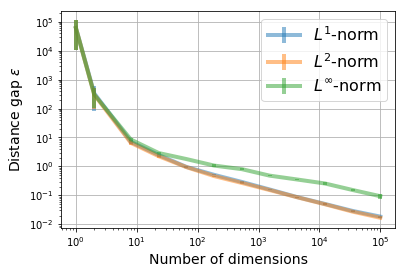

In [79]:
plt.errorbar(DIMS, np.mean(res[:,:,0], axis=0), np.std(res[:,:,0], axis=0), alpha=0.5, linewidth=4)
plt.errorbar(DIMS, np.mean(res[:,:,1], axis=0), np.std(res[:,:,1], axis=0), alpha=0.5, linewidth=4)
plt.errorbar(DIMS, np.mean(res[:,:,2], axis=0), np.std(res[:,:,2], axis=0), alpha=0.5, linewidth=4)
plt.loglog()
plt.grid()
plt.xlabel('Number of dimensions', fontsize=14)
plt.ylabel('Distance gap $\epsilon$', fontsize=14)
plt.legend(['$L^1$-norm', '$L^2$-norm', '$L^\infty$-norm'], fontsize=16)